**Car Price Prediction**

**Team:**
* Ricardo Avelar

**Course:** CISB 60 – ML and DL (Fall, 2024)

**Introduction**
  Hello my name is Ricardo Avelar and my project is using ML and DL to predict Car Prices.  This project goes into the relationship between a vehicle's engine horsepower and its manufacturer suggested retail price, leveraging both linear regression and deep learning techniques.  By utilizing a comprehensive datset including various car attributes, the analysis aims to quantify how engine performance impacts a vehicle's market value.  The methodology includes several steps, such as data cleaning to address missing values and outliers, exploratory feature analysis to identify meaningful correlations, and the constructions of predictive models.  In addition to building these models, the project emphasize the importance of hyperparameter tuning to optimize performance and improve predictive accuracy.  This investigation seeks to provide insights into the broaded implicatyions of engine performance on car valuation, offering vale to manufacturers, consumers, and industry analysts alike.  Ultimately, the project evaluates the strengths and limitations of different methodologies to establish a robust framework for predicting MSRP based on engine horsepower. 
        
* **Keywords:** Car Price, MSRP, Hyperparameter, Linear Regression, MSE, RMSE, MAE, Z-score 

**Methodology**

  Before building predictive models, the data was thoroughly examined and prepared for analysis.  I checked for missing values and handled them appropriately.  After doing that, I analyzed correlations between features to understand relationships.  I identified and removed outliers that could skew model predictions.  Missing data was either imputed using statistical method or filled with 'Unknown'.  The outliers in numerical columns were removed using Z-score analysis to ensure data quality.  Normalization was performed where necessary, using methods such as StandardScaler to standardize feature ranges. I also used Train-Test Split to split the data into training and testing set to ensure unbiased model evaluation.  

**Machine Learning Methodology**
  The ML approach focused on creating simpler models, such as Linear Regression, to determine the relationship between engine_hp and MSRP.  The model was trained on the training dataset.  Predictions were made on the test data using the trained model.  The metrics I used were: Mean Squared Error to assess prediction errors by penalizing large differences, R-Squared to measure the proportion of variance in the dependent variable explained by the model, and Root Mean Squared Error to square root the MSE for intuitive interpretability.  The performance of the Linear Regression model was analyzed using the metrics to evaluate its ability to generalize and predict unseen test data.
  
**Deep Learning Methodology**
   Deep Learning was used to capture more complex, non-linear relationships that a traditional ML model like linear regression might not capture.  A sequential neural network with multiple hidden layers was created to model the relationship between engine_hp and MSRP.  Hyperparameters like the number of layers, learning rate, dropout rate, and number of units per layer were optimized using Keras Tuner.  I used Keras Tuner for automated hyperparameter optimization.  This led to testing combinations of learning rates, units in layers, number of layers, and dropout rates to find the best-performing model.  The MSE assessed how far the predicted MSRP was from the actual value.  The MAE provided insights into the average magnitude of errors without squaring deviations.  The R-squared compared the proportion of variance explained by the deep learning model.  

**Required packages**

* install the required packages


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Your code starts here**

**EDA**

In [3]:
#Load Dataset from dataset examples
df = pd.read_csv('car_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#Check for missing values
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [5]:
missing_data = df[['Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category']].isnull().sum()
print(missing_data)

Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64


In [6]:
#Compute the median value for Engine HP and Engine Cylinders
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())

In [7]:
#Group by make or model to calculate more specific medians
df['Engine HP'] = df.groupby('Make')['Engine HP'].transform(lambda x: x.fillna(x.median()))
df['Engine Cylinders'] = df.groupby('Make')['Engine Cylinders'].transform(lambda x: x.fillna(x.median()))

In [8]:
#Cars typically have a common number of doors( ex. 4 for sedans. 2 for coupes)
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])

In [9]:
#Replace with Unknown for Market Category column
df['Market Category'] = df['Market Category'].fillna('Unknown')

In [10]:
#Verify results
print(df[['Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category']].isnull().sum())

Engine HP           0
Engine Cylinders    0
Number of Doors     0
Market Category     0
dtype: int64


In [12]:
#Replace the empty spaces in the column names with an underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [13]:
#display the column names
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

**Data Visualization**

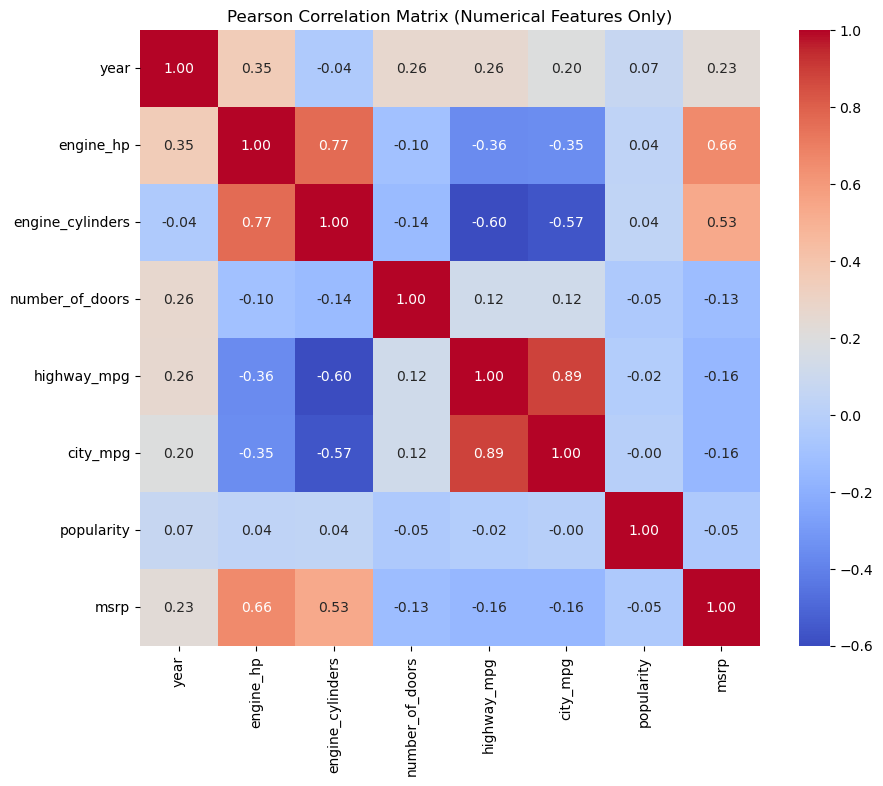

Pearson Correlation Matrix:
                      year  engine_hp  engine_cylinders  number_of_doors  \
year              1.000000   0.350573         -0.041459         0.263946   
engine_hp         0.350573   1.000000          0.767037        -0.102934   
engine_cylinders -0.041459   0.767037          1.000000        -0.140026   
number_of_doors   0.263946  -0.102934         -0.140026         1.000000   
highway_mpg       0.258240  -0.359457         -0.600947         0.118925   
city_mpg          0.198171  -0.353894         -0.565124         0.121206   
popularity        0.073049   0.036823          0.040815        -0.048251   
msrp              0.227590   0.661402          0.531139        -0.126081   

                  highway_mpg  city_mpg  popularity      msrp  
year                 0.258240  0.198171    0.073049  0.227590  
engine_hp           -0.359457 -0.353894    0.036823  0.661402  
engine_cylinders    -0.600947 -0.565124    0.040815  0.531139  
number_of_doors      0.118925  

In [16]:
#Filter only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

#Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix (Numerical Features Only)")
plt.show()

# Print the correlation matrix to the console
print("Pearson Correlation Matrix:")
print(correlation_matrix)

  Based on the correlation analysis, Engine HP has the strongest positive correlation with MSRP(0.661402).  Engine cylinders also positively correlate with MSRP, but the relationship is weaker than that of engine horsepower.  Fuel efficiency metrics like highway_mpg and city_mpg are negatively correlated with engine horsepower and engine cylinders.  This suggests a trade-off: more powerful engines consume more fuel, lowering miles per gallon.  Number of doors and popularity show minimal correlation with MSRP, indicating they are less likely to predict MSRP by themselves.

In [24]:
from scipy.stats import zscore
#Remove outliers using Z-score method
def remove_outliers_zscore(df, columns, threshold=3):
    for column in columns:
        df = df[(zscore(df[column].dropna()).abs() < threshold)]
    return df

#List of numerical columns to check for outliers
numerical_columns = ['year','engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg','city_mpg', 'popularity', 'msrp'] 
# Apply the Z-Score method
df_cleaned = remove_outliers_zscore(df, numerical_columns)

# Check the shape of the dataset after outlier removal
print(f"Dataset shape after removing outliers (Z-Score): {df.shape}")

Dataset shape after removing outliers (Z-Score): (11095, 16)


C:\Users\ravelar2\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


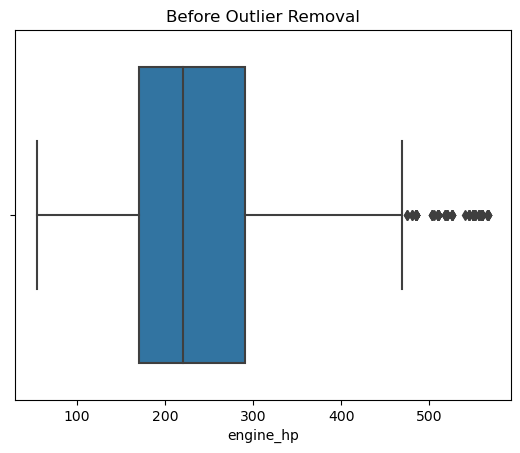

C:\Users\ravelar2\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


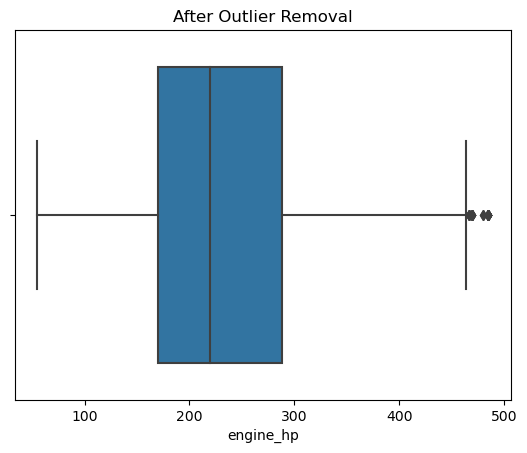

In [25]:
# Before outlier removal
sns.boxplot(data=df, x='engine_hp')
plt.title("Before Outlier Removal")
plt.show()

# After outlier removal
sns.boxplot(data=df_cleaned, x='engine_hp')
plt.title("After Outlier Removal")
plt.show()

**Machine Learning Section**

In [29]:
df_cleaned.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [30]:
# Separate features and target
X = df_cleaned[['engine_hp']]  # Feature
y = df_cleaned['msrp']         # Target

In [31]:
#Split the dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 131474394.0709023
R-squared: 0.5628265315777696


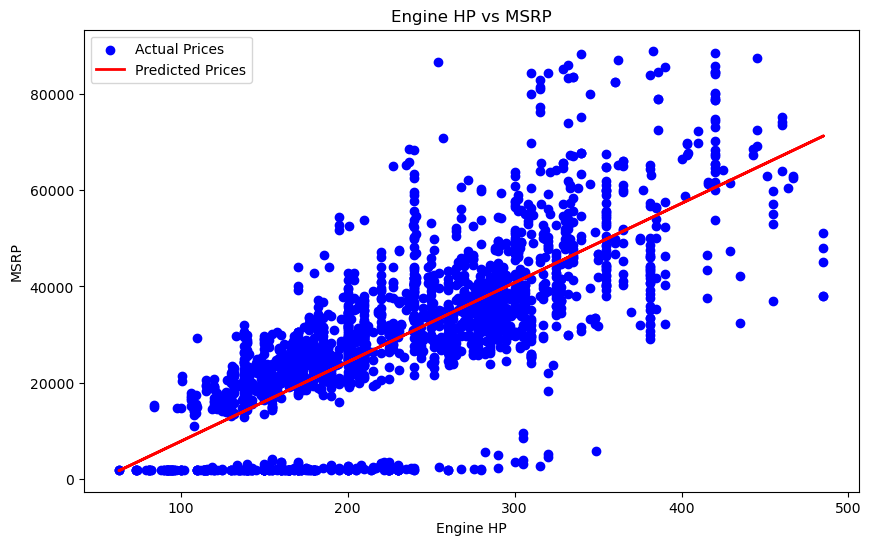

In [33]:
#Train a Machine Learning Model(Linear Regression Model)
# Train the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.legend()
plt.show()

The plot created visually represents the relationship between Engine HP (the feature) and MSRP (the target variable) in the context of the predictions made by a Linear Regression model. The blue dots represents the actual prices(MSRP) for the test data.  Each blue dot corresponds to the true MSRP value for a given Engine Hp value in the test set.  This shows the actual distribution of data.  The red line represents the predicted prices(MSRP) generated by the linear regression model.  It is a continuous line because the linear regression model predicts MSRP values as a linear function of Engine HP.  The red line shows how the model fits the data, essentially being the best-fit line for the training data.  The model is capturing the relationship effectively.

In [34]:
#Calculate Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 131474394.0709023
Root Mean Squared Error: 11466.22841525941


The MSE is very large because the target variable(MSRP) has high numerical values.  To make the MSE more interpretable, we can compute the Root Mean Squared Error which gives us 11,466.63.  This suggests that, on average, the model's predictions deviate from the actual prices by about $11,466.

The R squared value of 0.5628 suggest that while Engine Hp is a significant predictor of MSRP, there is still a large portion of variability(~43.7) in car prices that is not explained by Engine HP alone.  This indicates that other factors play a significant role in determing the MSRp and should be included to improve the model.

**Deep Learning Section**

In [35]:
#Import required libraries for Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from sklearn.preprocessing import StandardScaler

In [36]:
features = ['engine_hp']  
target = 'msrp'

# Split into X (features) and y (target)
X = df[features].values
y = df[target].values

In [37]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scale the features for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#Use a sequential model with dense layers.  Use ReLU activation for hidden layer and no activation for the output layer
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\ravelar2\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
#Use a portion of the training data for validation.  Train for a reasonable number of epochs
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1356882048.0000 - mae: 31036.1992 - val_loss: 1400827520.0000 - val_mae: 31436.0762
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1383778944.0000 - mae: 31017.5293 - val_loss: 1368787840.0000 - val_mae: 31007.2754
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1330635776.0000 - mae: 30532.8945 - val_loss: 1276592256.0000 - val_mae: 29826.7344
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1225600384.0000 - mae: 29107.4863 - val_loss: 1108751616.0000 - val_mae: 27716.6855
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1005735488.0000 - mae: 26325.5469 - val_loss: 884407232.0000 - val_mae: 24829.7559
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 809056000.0000 - mae: 23580.2227 - val_loss: 644885504.0000 - val_mae: 21267.5156
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 564841664.0000 - mae: 19713.5508 - val_loss: 437298016.0000 - val_mae: 17354.88

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 163966144.0000 - mae: 9406.4951 - val_loss: 160750784.0000 - val_mae: 9273.3369
Epoch 48/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 158650592.0000 - mae: 9221.2568 - val_loss: 160752720.0000 - val_mae: 9274.4404
Epoch 49/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 155911584.0000 - mae: 9162.9453 - val_loss: 160740144.0000 - val_mae: 9270.2441
Epoch 50/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 157783952.0000 - mae: 9223.3682 - val_loss: 160818320.0000 - val_mae: 9274.7100


In [42]:
#Evaluate the Model.  Calculate the loss and MAE
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 144289536.0000 - mae: 8835.2041
Test Loss (MSE): 145168464.0
Test MAE: 8832.4970703125


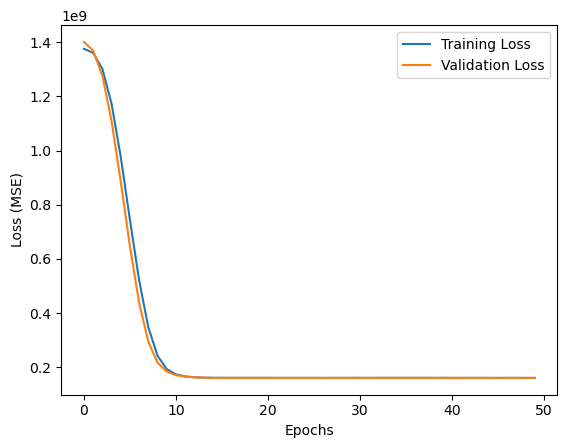

In [43]:
#Visualize Training Progress. Plot the training and validation loss to check for overfitting or underfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


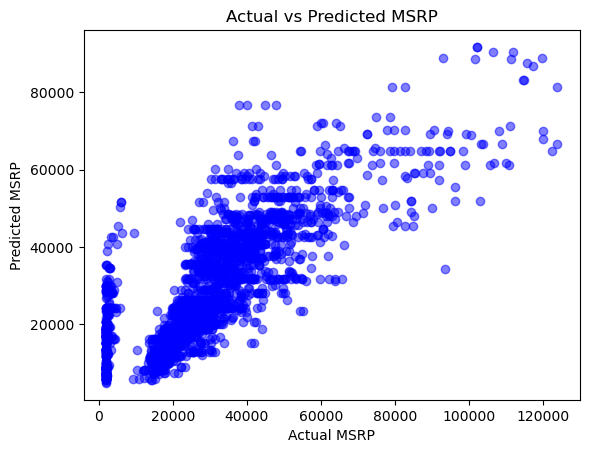

In [44]:
#Use the trained model to predict MSRP for the test set
y_pred = model.predict(X_test)

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.title('Actual vs Predicted MSRP')
plt.show()

**How is the model in general?**

The model appears to have captured some relationship between Engine HP and MSRP since the errors, while high, are not entirely random.  This suggests that the feature has predictive power for car prices.  An MAE of $8,832.50 and MSE of 145,168,464 are reasonable baseline model that only uses Engine HP as a predictor.

**Is it making good predictions?**

It provides a quick estimation of MSRP based solely on Engine HP and performs reasonably well.  However, its predictions are not highly accurate and might not be practical for precise price determination.

### Hyperparameter Tuning

In [50]:
#Import Required Libraries
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch

In [52]:
# Define the model builder function
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_rate', 0.0, 0.5, step=0.1))) 
    # Output layer
    model.add(Dense(1))  # Regression output
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                  loss='mse',
                  metrics=['mae'])
    
    return model  

In [53]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='my_dir',
    project_name='car_price_tuning'
)

In [54]:
# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Trial 10 Complete [00h 00m 53s]
val_mae: 10893.6455078125

Best val_mae So Far: 9039.5537109375
Total elapsed time: 00h 10m 58s


In [55]:
# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

C:\Users\ravelar2\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [56]:
# Summary of the best hyperparameters
print("Best hyperparameters:")
print(f"Units in input layer: {best_hps.get('units_input')}")
print(f"Number of layers: {best_hps.get('num_layers')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")
print(f"Dropout rate: {best_hps.get('dropout_rate')}")

Best hyperparameters:
Units in input layer: 160
Number of layers: 2
Learning rate: 0.001
Dropout rate: 0.1


The input layer has 160 neurons(units).  This number of units allow the model to learn sufficient representations of the data, mapping the input features effectively into the first layer's space.  The model has 2 hidden layers in addition to the input layer.  Two layers are enough to capture non-linear relationships in most regression problems.  Having two layers suggest that the model has sufficient capacity to learn pattern in the data without being overly complex.  A learning rate of 0.0001 means that the model adjusts its weights gradually with each epoch during training.  This allows stable convergence while minimizing the risk of overshooting optimal weights.  A 0.1 dropout rate means that 10% of the neurons are randomly "dropped out" during each training epoch to prevent over-reliance on specific neurons.  This rate ensures that the model doesn't rely too much on specific neurons and instead learns a more generalized pattern from the data.

**Visualize the effects of Hyperparameters**

In [59]:
# Function to create the model dynamically
def create_model(input_shape, units_per_layer=160, num_layers=2, learning_rate=0.001, dropout_rate=0.1):
    """
    Creates a Keras deep learning model using given hyperparameters.
    """
    model = Sequential()
    
    # Input layer
    model.add(Dense(units_per_layer, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(dropout_rate))
    
    # Hidden layers
    for _ in range(num_layers - 1):  # Create (num_layers - 1) layers
        model.add(Dense(units_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))  # Single output for regression
    
    # Compile the model with the learning rate
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model


# Define combinations of hyperparameters
hyperparameter_combinations = [
    {'units_per_layer': 128, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1},
    {'units_per_layer': 160, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1},
    {'units_per_layer': 256, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1},
    {'units_per_layer': 160, 'num_layers': 3, 'learning_rate': 0.001, 'dropout_rate': 0.2},
    {'units_per_layer': 160, 'num_layers': 1, 'learning_rate': 0.001, 'dropout_rate': 0.2},
    {'units_per_layer': 160, 'num_layers': 2, 'learning_rate': 0.01, 'dropout_rate': 0.1},
    {'units_per_layer': 160, 'num_layers': 2, 'learning_rate': 0.0001, 'dropout_rate': 0.3},
]

# Initialize the results list
results = []

# Loop over hyperparameter combinations
for params in hyperparameter_combinations:
    print(f"Training with params: {params}")
    
    # Create the model with specified hyperparameters
    model = create_model(
        input_shape=X_train.shape[1], 
        units_per_layer=params['units_per_layer'], 
        num_layers=params['num_layers'], 
        dropout_rate=params['dropout_rate']
    )
    
    # Train the model
    history = model.fit(
        X_train, 
        y_train, 
        validation_split=0.2, 
        epochs=50, 
        batch_size=32,
        verbose=0  # Suppress training output
    )
    
    # Evaluate the model on test data
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    
    # Append results for comparison
    results.append({
        'params': params,
        'test_loss': loss,
        'test_mae': mae,
    })

# Print results for comparison
for result in results:
    print(f"Params: {result['params']}, Test Loss: {result['test_loss']}, Test MAE: {result['test_mae']}")


Training with params: {'units_per_layer': 128, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1}
Training with params: {'units_per_layer': 160, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1}
Training with params: {'units_per_layer': 256, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1}
Training with params: {'units_per_layer': 160, 'num_layers': 3, 'learning_rate': 0.001, 'dropout_rate': 0.2}
Training with params: {'units_per_layer': 160, 'num_layers': 1, 'learning_rate': 0.001, 'dropout_rate': 0.2}
Training with params: {'units_per_layer': 160, 'num_layers': 2, 'learning_rate': 0.01, 'dropout_rate': 0.1}
Training with params: {'units_per_layer': 160, 'num_layers': 2, 'learning_rate': 0.0001, 'dropout_rate': 0.3}
Params: {'units_per_layer': 128, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1}, Test Loss: 144832512.0, Test MAE: 8822.435546875
Params: {'units_per_layer': 160, 'num_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.

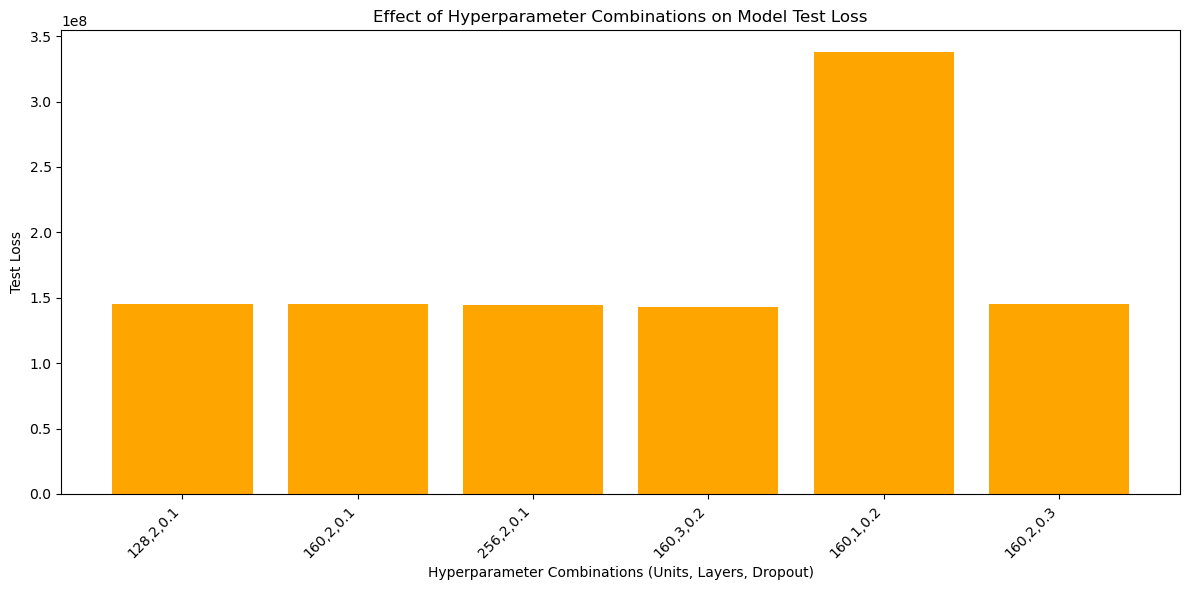

In [60]:
test_losses = [result['test_loss'] for result in results]
labels = [f"{r['params']['units_per_layer']},{r['params']['num_layers']},{r['params']['dropout_rate']}" for r in results]

plt.figure(figsize=(12, 6))
plt.bar(labels, test_losses, color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hyperparameter Combinations (Units, Layers, Dropout)')
plt.ylabel('Test Loss')
plt.title('Effect of Hyperparameter Combinations on Model Test Loss')
plt.tight_layout()
plt.show()

**Model Comparison**

  The simpler Linear Regression approach provided a baseline for comparison.  The Deep Learning Model demonstrated the ability to model more complex, non-linear patterns in the data, potentially capturing precise influences of engine_hp on MSRP.  DL model showed improvement over traditional ML model when fine-tuned with optimal hyperparameters.    

**Conclusions**


  With this project, I trained and evaluated machine learning and deep learning models to predict MSRP based on the feature Engine HP.  The linear regression model provided a baseline performance, with metrics such as Mean Squared Error and R-squared suggesting moderate predictive power.  Deep Learning models were further trained with hyperparameter tuning, leading to variations in performance depending on parameters like number of layers, units per layer, dropout rate, and learning rate.  Hyperparameter tuning revealed that combinations such as 160 units in the input layer, 2 hidden layers, learning rate = 0.001, and dropout rate = 0.1 provided a balance between bias and variance, with models showing improved generalization.  The analysis demonstrated that selecting optimal hyperparameters improved the model's ability to generalize on unseen test data.  Test performance was assessed using metrics like Mean Squared Error and Mean Absolute Error, with results indicating the average deviation between predicted and actual values. I was able to determine that Engine Horsepower(HP) was a strong predictor of MSRP.  The deep learning model outperformed simple linear regression by capturing non-linear relationships.  The models relied on a limited number of features, and futrue work could involve incorporating more external features such as vehicle age, location, or historical sales data.
  The project demonstrated the journey of moving from exploratory data analysis and outlier removal to model building, training, hyperparameters, and model design choices impact performance.  The findings pave the way for future exploration into richer datasets and more advanced models to enhance further predictions.

**References**

In [ ]:
Main Source- Example 1 - Car Price Predictions

**Credits**

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

This code is based on http://localhost:8888/notebooks/Downloads/Example%201%20-%20Car%20Price%20Predictions/Example%201%20-%20Car%20Price%20Predictions.ipynb